In [1]:
%load_ext autoreload
%aimport base

In [2]:
%%capture
%run table.ipynb

In [3]:
%matplotlib inline
df = df_w[df_w["$n$"] == 960]
df

,$n$,$c$,$\nu_8$,$f$,$\epsilon$,$\frac{k_{diss}}{k_f}$,$F_f$,$Ro_f$,$Bu$,$\frac{<\bf \Omega_0 >}{{(P k_f^2)}^{2/3}}$,$E$,$t_{stat}$,$t_{\max}$,short name
W1,960,10,1.56e-10,0,1.04,28.8,0.111,inf,inf,1,2.63,4.45,49.9,noise_c10nh960Buinf
W5,960,20,1.56e-10,0,1,28.8,0.055,inf,inf,1,3.12,4.88,49.9,noise_c20nh960Buinf
W9,960,40,1.56e-10,0,0.996,28.8,0.0274,inf,inf,1,3.95,6.02,49.8,noise_c40nh960Buinf
W12,960,100,1.56e-10,0,0.999,28.8,0.011,inf,inf,1,5.92,8.72,49.8,noise_c100nh960Buinf
W16,960,400,1.56e-10,0,1.14,28.8,0.00287,inf,inf,1,12.3,15.9,120,noise_c400nh960Buinf
W19,960,700,1.56e-10,0,1.27,28.8,0.0017,inf,inf,1,16.9,19.1,49.8,noise_c700nh960Buinf


In [4]:
import fluidsim as fls
import numpy as np
from base import _k_f, set_figsize, _rxs_str_func, matplotlib_rc, _eps, _k_f
from paths import paths_sim, exit_if_figure_exists
from fractions import Fraction


def froude(sim, t_start):
    eps = _eps(sim, t_start)
    c = sim.params.c2 ** 0.5
    L_f = np.pi / _k_f(sim.params)
    F_f = (eps * L_f) ** (1. / 3) / c
    return F_f


def fig_struct(path, fig, axes, order=[2, 4], tmin=0, tmax=1000, delta_t=0.5, label="", run_nb=0):
    sim = fls.load_sim_for_plot(path, merge_missing_params=True)

    key_var = [
        'ux',
        'uy'
    ]
    rxs, So_var_dict, deltax = _rxs_str_func(
        sim, order, tmin, tmax, delta_t, key_var, cache=False)

    ones = np.ones(rxs.shape)

    L_f = np.pi / _k_f(sim.params)
    F_f = froude(sim, tmin)
    eps = _eps(sim, tmin)
    alpha = 1 
    # alpha = Fraction(4, 9)

    color_list = ['r', 'b', 'g', 'c', 'm', 'y', 'k']
    for i, (o, ax_row) in enumerate(zip(order, axes)):
        for j, (key, ax) in enumerate(zip(key_var, ax_row)):
            color1 = color_list[run_nb]
            ## Old scaling
            # norm = 1 ; exp1 = None
            ## New scaling
            # norm = (L_f * F_f**alpha)**(o/3 - 1) * eps**(o/3) ; exp1 = "{%d/3 - 1}" % o
            ## Alternate scaling
            norm = (L_f * F_f**alpha)**(-1/3) * eps**(o/3) ; exp1 = "{-1/3}"

            # So = So_var_dict['{0}_{1:.0f}'.format(key, o)] / norm / rxs
            So = So_var_dict['{0}_{1:.0f}'.format(key, o)] / norm / rxs**(o-1)  # r^(p-1)
            ax.loglog(rxs, So, color1, linewidth=2, label=label)
            ax.set_xlabel(f'$r_x$')

            exp0 = "{%s}" % alpha          
            exp2 = "{%d/3}" % o
            if norm == 1:
                ax.set_ylabel(f'$<\delta {key}>^{o} / r_x$')
            else:
                ax.set_ylabel(f'$<\delta {key}>^{o} / (L_f F_f^{exp0})^{exp1} \epsilon^{exp2} r_x)$')

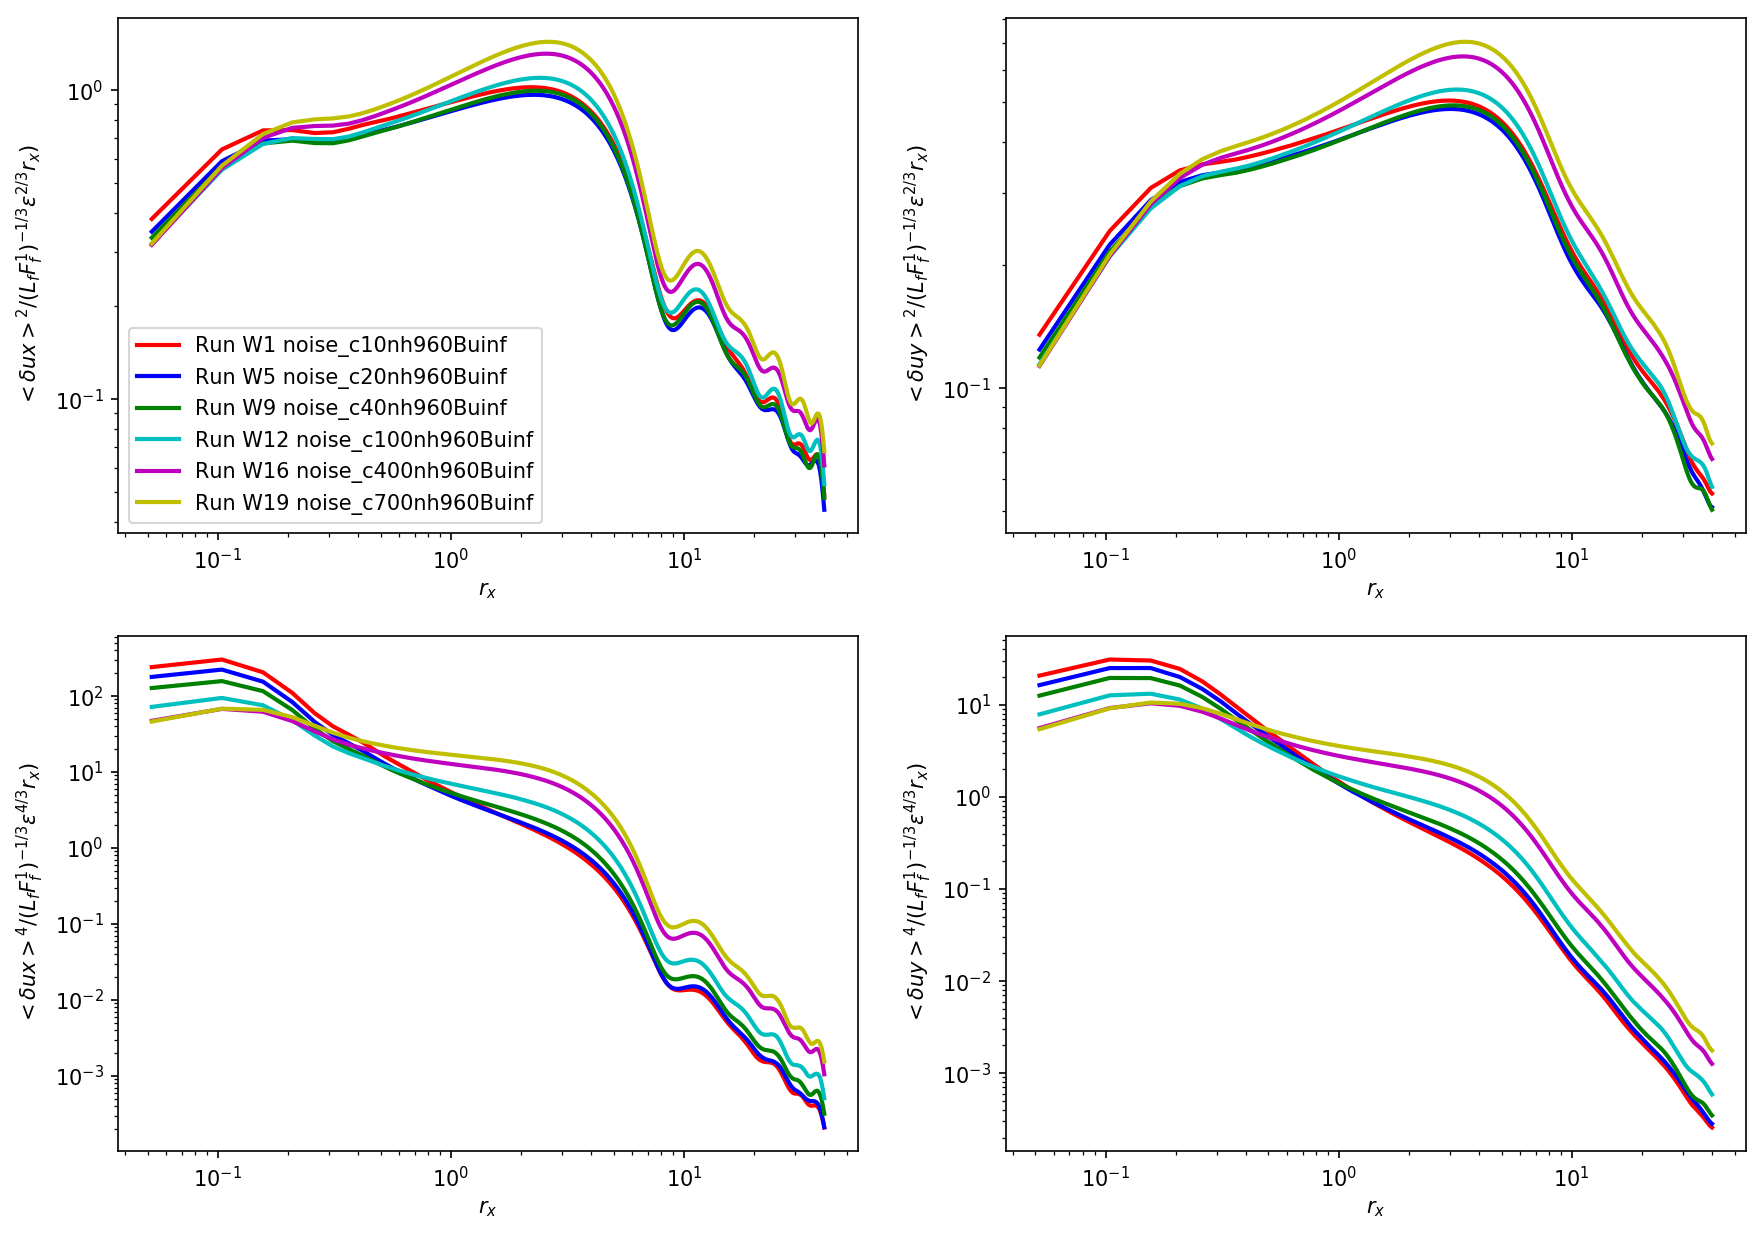

In [5]:
%%capture --no-display
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, dpi=150, figsize=(14,10))
for i in range(len(df)):
    row = df.iloc[i]
    short_name = row["short name"]
    path = paths_sim[short_name]
    tmin = row[r"$t_{stat}$"]
    fig_struct(path, fig, axes, tmin=tmin, label=f"Run {row.name} {short_name}", run_nb=i%6)

axes[0,0].legend()